In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, roc_auc_score

In [57]:
df_sredondeo =pd.read_csv("earthquake_1995-2023.csv")
df = df_sredondeo.round(1)
#en la escala de Richter, un terremoto se considera significativo a partir de una magnitud de 3.5.
df['terremoto'] = np.where(df['magnitude'] >= 3.5, 1, 0)
# Crear la columna 'intensidad' con las categorías especificadas
df['intensidad'] = np.where(df['magnitude'] <= 3.5, 'leve',
                           np.where(df['magnitude'] <= 6.5, 'moderado', 'fuerte'))


df['date_time']=pd.to_datetime(df['date_time'])
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)    

def mapear_intensidad(valor):
    if valor == 'moderado':
        return 1
    elif valor == 'fuerte':
        return 0
  
df['intensidad'] = df['intensidad'].apply(mapear_intensidad)
df.head(3)

C:\Users\User\AppData\Local\Temp\ipykernel_34472\835356500.py:10: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time']=pd.to_datetime(df['date_time'])


,title,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,...,depth,latitude,longitude,location,continent,country,terremoto,intensidad,Year,Month
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,7,4,green,0,657,us,114,7.2,...,193.0,-13.9,167.2,"Sola, Vanuatu",NaN,Vanuatu,1,1,2023,8
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,8,6,yellow,0,775,us,92,0.7,...,69.7,12.8,-88.1,"Intipucá, El Salvador",NaN,NaN,1,1,2023,7
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,7,5,green,0,899,us,70,1.6,...,171.4,-38.2,-70.4,"Loncopué, Argentina",South America,Argentina,1,0,2023,7


<Axes: >

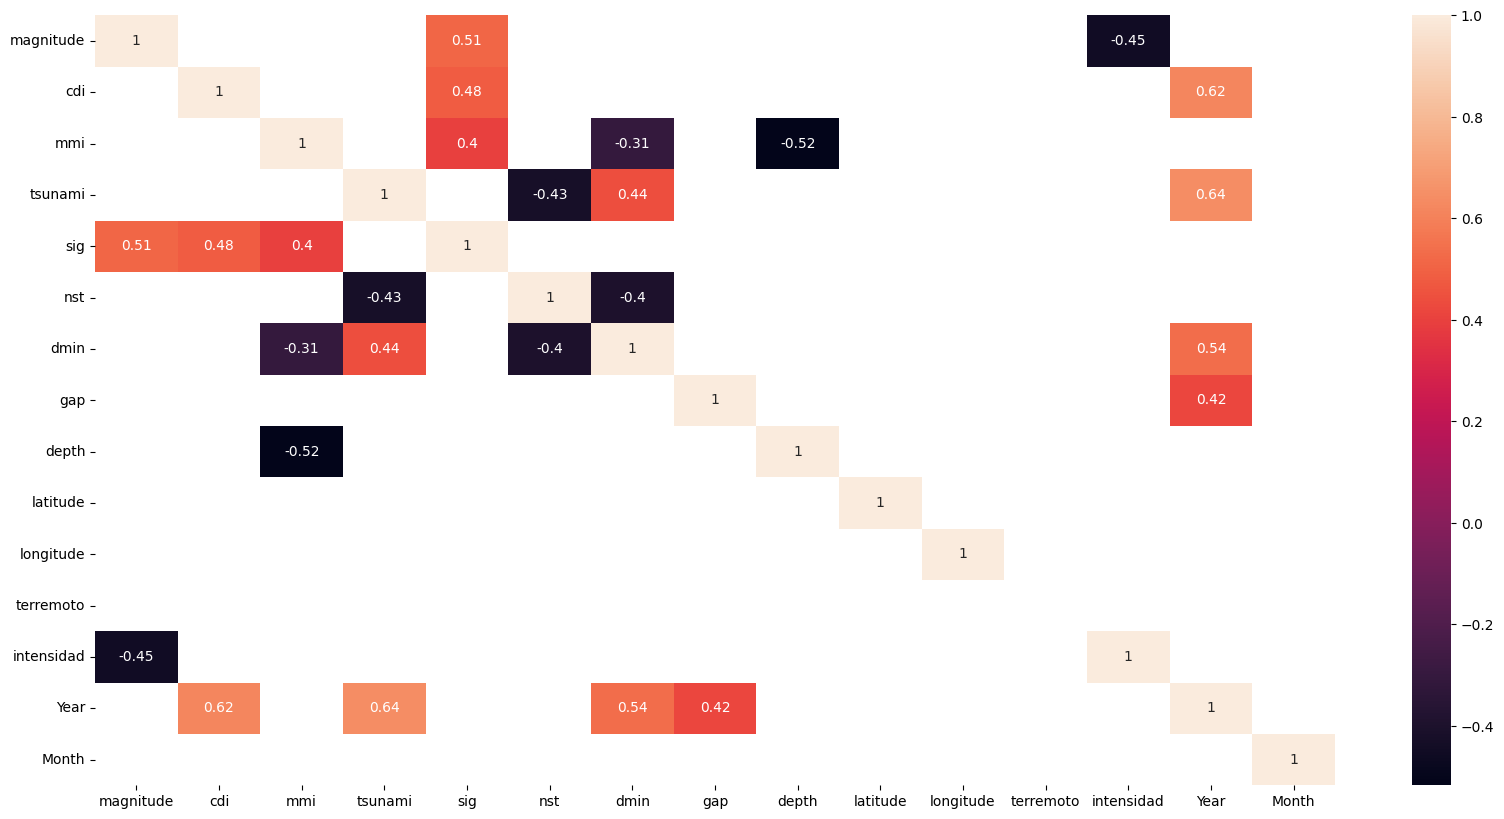

In [58]:
obj=df.select_dtypes(include=['object'])
obj.head()
df.drop(['title', 'continent', 'alert','location','country','magType','net'],axis=1,inplace=True)
d=df.corr()
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(20,10))
sns.heatmap(d,annot=True)

In [59]:
# Seleccionar variables (X) y objetivo (y)
#X = df.drop('sig', axis=1)  # Suponiendo que 'tsunami' es el objetivo
X = df[['magnitude', 'cdi', 'mmi',  'sig', 'nst', 'dmin']]
y = df['intensidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Crear el modelo de regresión logística
model = LogisticRegression() 

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       259
           1       1.00      0.56      0.72        41

    accuracy                           0.94       300
   macro avg       0.97      0.78      0.84       300
weighted avg       0.94      0.94      0.93       300



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# Seleccionar variables (X) y objetivo (y)
#X = df.drop('sig', axis=1)  # Suponiendo que 'tsunami' es el objetivo
X = df[['magnitude', 'sig']]
y = df['intensidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Crear el modelo de regresión logística
model = LogisticRegression() 

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       259
           1       1.00      0.90      0.95        41

    accuracy                           0.99       300
   macro avg       0.99      0.95      0.97       300
weighted avg       0.99      0.99      0.99       300



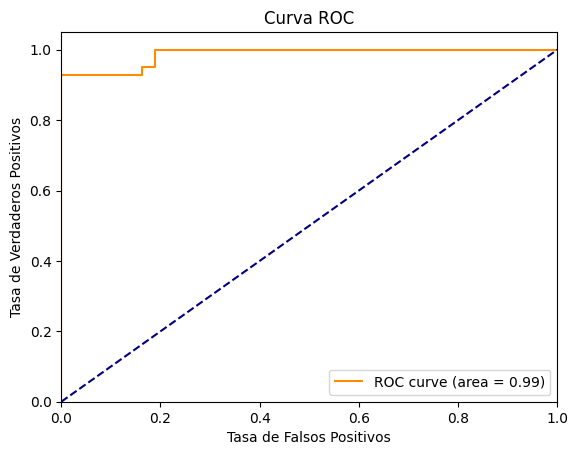

Text(0.5, 1.0, 'Histograma de errores')

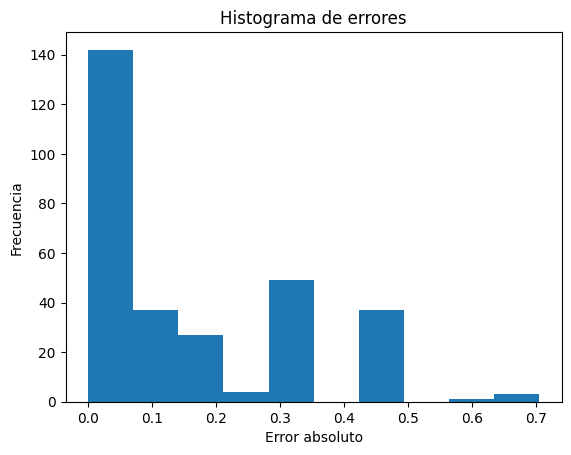

In [61]:
# Calcular las probabilidades de pertenecer a la clase positiva
y_pred = model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

plt.show()

# Histograma de errores
errors = np.abs(y_test - y_pred)
plt.hist(errors, bins=10)
plt.xlabel('Error absoluto')
plt.ylabel('Frecuencia')
plt.title('Histograma de errores')

In [62]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import pickle

app = Flask(__name__)
CORS(app)  # Habilitar CORS para permitir solicitudes desde el frontend

# Cargar el modelo previamente entrenado
with open('modelo_terremotos.pkl', 'rb') as model_file:
    modelo = pickle.load(model_file)

@app.route('/')
def home():
    return "Bienvenido a la API de predicción de terremotos"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Obtener los datos enviados por el cliente
        data = request.get_json()
        
        # Extraer las características del JSON recibido
        features = [
            data['magnitude'], data['depth'], data['latitude'],
            data['longitude'], data['year'], data['month']
        ]
        
        # Realizar la predicción
        prediction = modelo.predict([features])
        
        # Devolver la predicción
        return jsonify({'prediccion': prediction[0]})
    
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
